# 関数定義
IDAJ HPより　　
https://www.idaj.co.jp/blog/product/optimization/basic-cao-181219

In [1]:
import numpy as np

In [52]:
def beam(X):#(T, B, L, H, F, S):
    T, B, L, H, F, S = X[0], X[1], X[2], X[3], X[4], X[5]
    Wc, Mc = 100, 150
    Young = 200 #(E/GPa) 鉄のヤング率参照
    Wvol = H ** 2 * L
    Mvol = T * B * (S + L)
    Cost = (Wc * Wvol + Mc * Mvol) #最小化
    Area = L * H * np.sqrt(2)
    t1 = (F * (S + L/2))/(B * Area)
    t2 = F/(2 * Area)
    Disp = (F * S ** 3)/(4 * T ** 3 * B * Young) #最小化 
    MaxS = np.sqrt(t1 ** 2 + t2 ** 2)
    MaxT = (6 * S *F)/(T ** 2 * B)
    
    return np.c_[-Disp, -Cost]#, MaxS, MaxT, 

# PHYSBO
よくわからん

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import physbo
import itertools

In [48]:
class simulator(object):
    def __init__(self, X):
        self.t = beam(X) 
        
    def __call__(self, action):
        return self.t[action]

In [69]:
T = np.linspace(0.1, 100, 11)
B = np.linspace(0.1, 100, 11)
L = np.linspace(0.1, 50, 11)
H = np.linspace(0.1, 30, 11)
S = 500 * np.ones(11)
F = 10 * np.ones(11)
test_X = np.array(list(itertools.product(T, B, L, H, F, S))).T

In [70]:
test_X.shape

(6, 1771561)

In [56]:
sim = simulator(test_X)

In [73]:
policy = physbo.search.discrete_multi.policy(test_X=test_X, num_objectives=2)
policy.set_seed(0)

policy.random_search(max_num_probes=16, simulator=sim)
res_TS = policy.bayes_search(max_num_probes=40, simulator=sim, score='TS', interval=10)

0001-th step: f(x) = [-1.25e-03 -5.00e+10] (action = 5)
   Pareto set updated.
   the number of Pareto frontiers = 1 

0002-th step: f(x) = [-0.00125 -0.4    ] (action = 1)
   Pareto set updated.
   the number of Pareto frontiers = 1 

0003-th step: f(x) = [-0.00125 -0.4    ] (action = 2)
   Pareto set updated.
   the number of Pareto frontiers = 2 

0004-th step: f(x) = [-1.25e-03 -4.00e+05] (action = 4)
0005-th step: f(x) = [-0.00125 -0.4    ] (action = 0)
   Pareto set updated.
   the number of Pareto frontiers = 3 

0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
   Pareto set updated.
   the number of Pareto frontiers = 4 

0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0.4    ] (action = 3)
0006-th step: f(x) = [-0.00125 -0

/Users/yocchan/.pyenv/versions/3.8.0/lib/python3.8/site-packages/physbo/gp/lik/gauss.py:156: RuntimeWarning: divide by zero encountered in log
  return np.log(np.std(t) / 10)
/Users/yocchan/.pyenv/versions/3.8.0/lib/python3.8/site-packages/physbo/gp/cov/gauss.py:385: RuntimeWarning: divide by zero encountered in log
  params = np.append(np.log(width + 1e-8), np.log(scale))


Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -49.748111107036515
50 -th epoch marginal likelihood -49.74811110705423
100 -th epoch marginal likelihood -49.74811110707194
150 -th epoch marginal likelihood -49.748111107089635
200 -th epoch marginal likelihood -49.74811110710733
250 -th epoch marginal likelihood -49.74811110712502
300 -th epoch marginal likelihood -49.7481111071427
350 -th epoch marginal likelihood -49.74811110716036
400 -th epoch marginal likelihood -49.74811110717804
450 -th epoch marginal likelihood -49.7481111071957
500 -th epoch marginal likelihood -49.748111107213354
Done

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 460.020065557081
50 -th epoch marginal likelihood 429.6374462297249
100 -th epoch marginal likelihood 403.26885562570874
150 -th epoch marginal likelihood 380.36388199909356
200 -th epoch marginal likelihood 360.3421404849163
250 -th epoch mar

探査空間広すぎ、、、

In [77]:
def plot_pareto_front(res):
    front, front_num = res.export_pareto_front()
    dominated = [i for i in range(res.num_runs) if i not in front_num]
    points = res.fx[dominated, :]

    plt.figure(figsize=(7, 7))
    plt.scatter(res.fx[dominated,0], res.fx[dominated,1], c = "blue")
    plt.scatter(front[:, 0], front[:, 1], c = "red")
    plt.title('Pareto front')
    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    #plt.xlim([-1.0,0.0])
    #plt.ylim([-1.0,0.0])

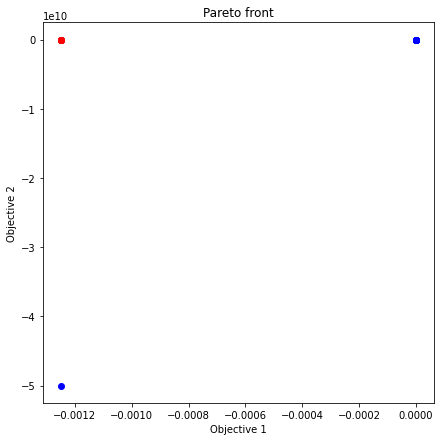

In [78]:
plot_pareto_front(res_TS)

In [80]:
front, front_num = res_TS.export_pareto_front()

In [82]:
front_num

array([1, 2, 4, 5])

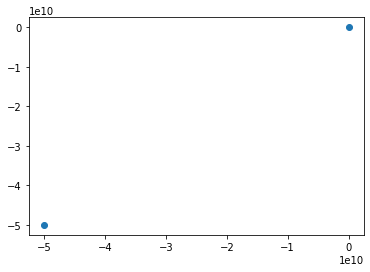

In [85]:
plt.scatter(res_TS.fx[0], res_TS.fx[0])

In [89]:
res_TS.fx[0]

array([-1.25e-03, -5.00e+10])